In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df.shape

(2035, 8)

In [ ]:
df.size

16280

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
#checking for null values
df.isnull().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2030    False
2031    False
2032    False
2033    False
2034    False
Length: 2035, dtype: bool

In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

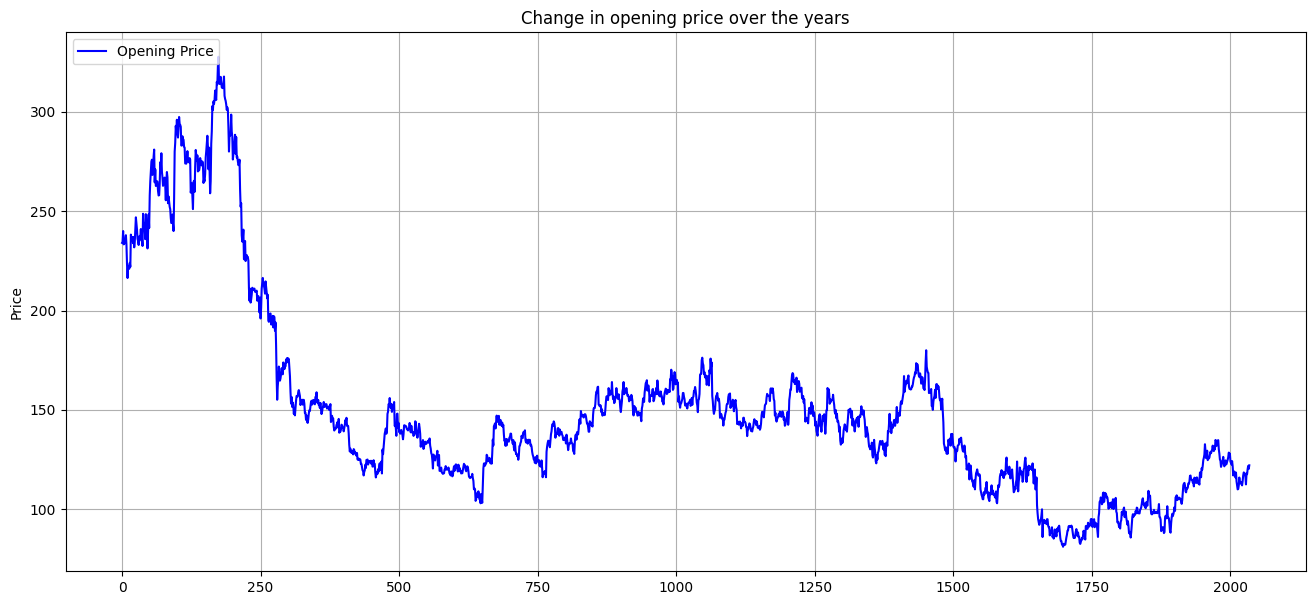

In [ ]:
plt.figure(figsize=(10,6))
df['Open'].plot(kind='line',figsize=(16,7),color='b',label="Opening Price")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()
     


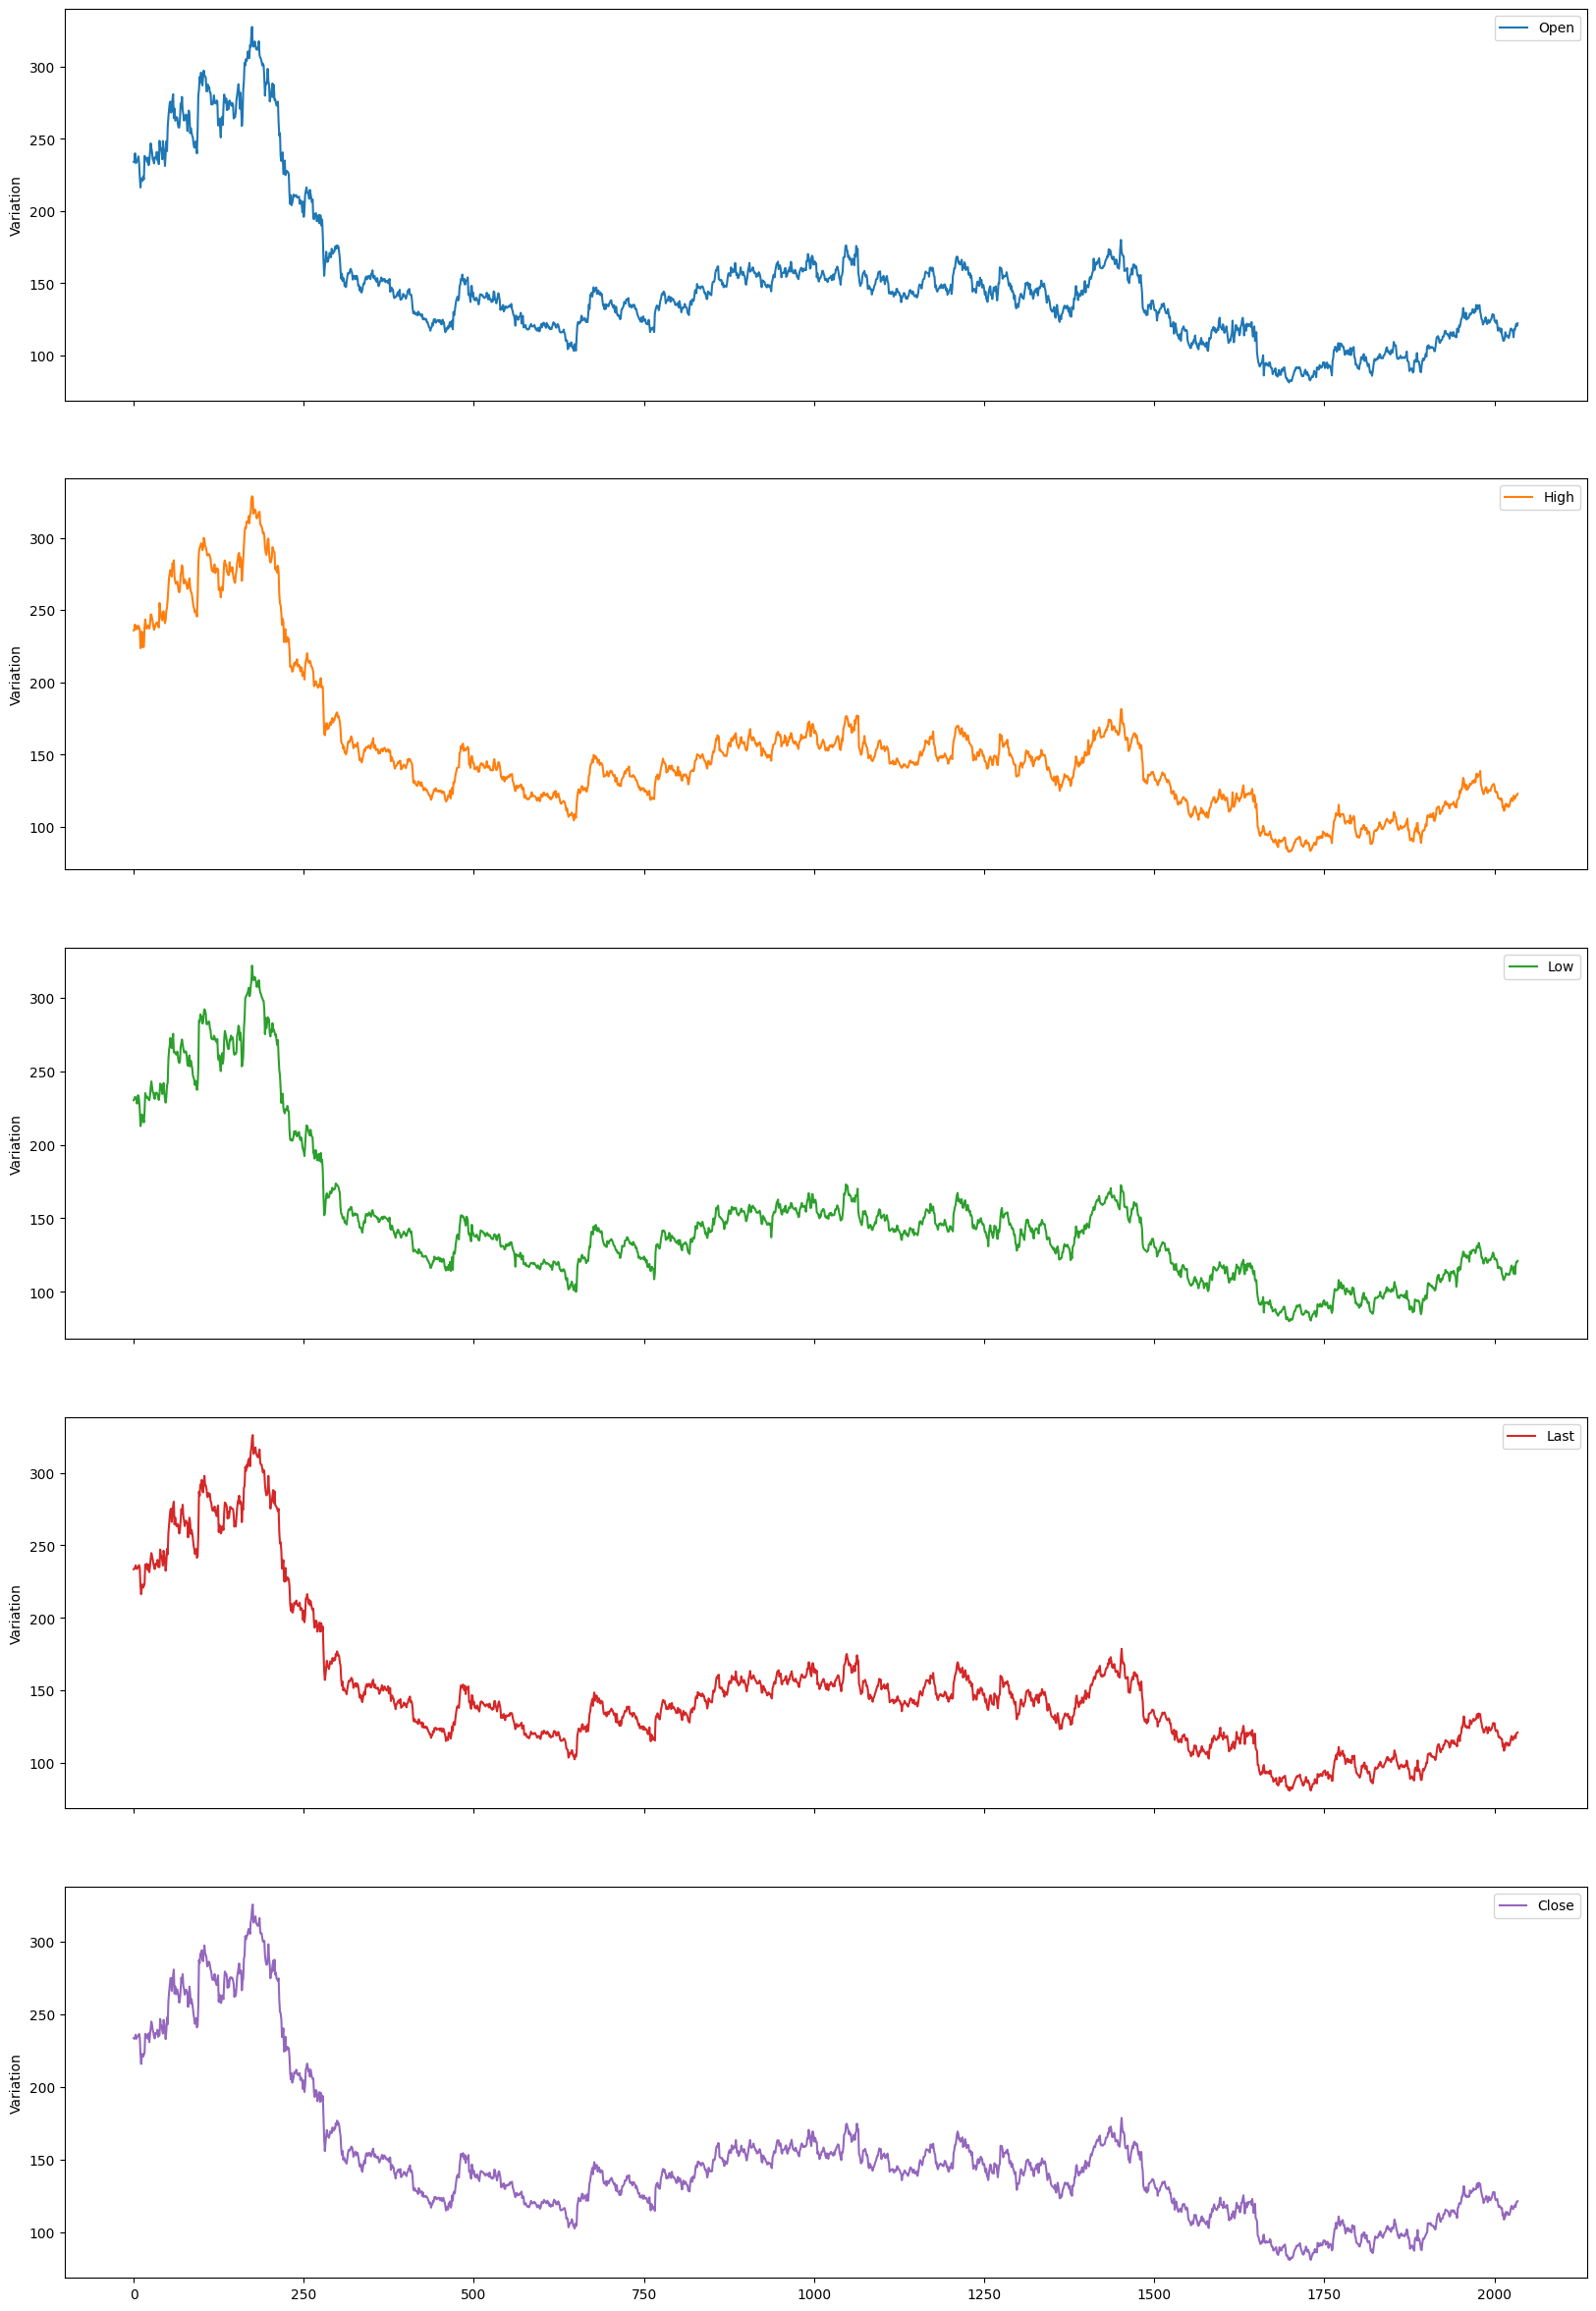

In [ ]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

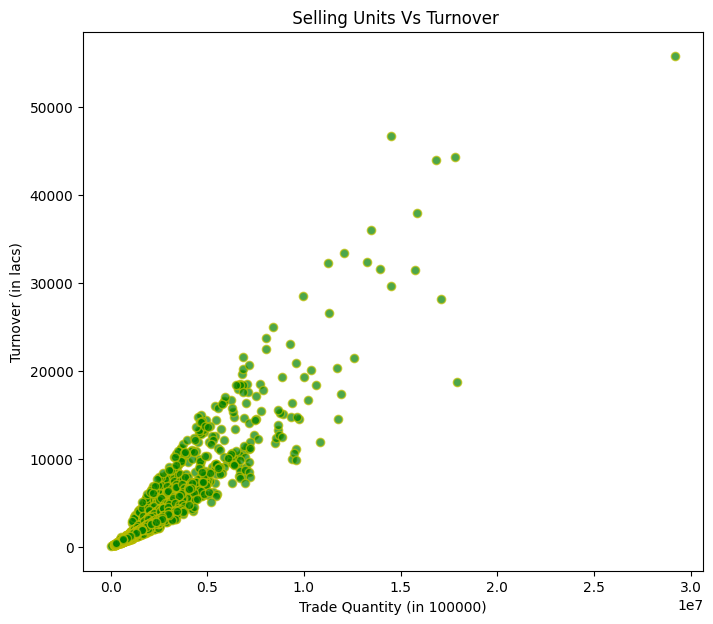

In [ ]:
#Scatter plot

fig=plt.figure(figsize=(8,7))
plt.scatter(df['Total Trade Quantity'],df['Turnover (Lacs)'], alpha=0.7, edgecolor='y', color='green')
plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title(" Selling Units Vs Turnover")
plt.show()

<ipython-input-77-fb76b9b8f078>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


<Axes: >

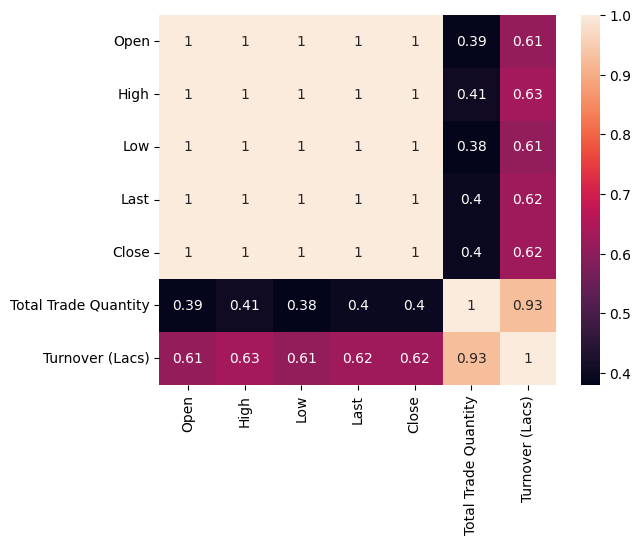

In [ ]:
#Heat map
cor=df.corr()
sns.heatmap(cor,annot=True)

In [ ]:
#Scaling the data
df1=df.drop(columns='Date')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df1.values)


In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-09-28,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2010-07-27,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [ ]:
del df["Date"]

In [ ]:
df.dtypes

Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Define the training and testing set sizes
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size

# Split the data into training and testing sets
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]


In [ ]:
# Create training sequences
def create_sequences(data, seq_length):
    X = []
    y = []

    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length, 0]
        target = data[i + seq_length, 0]
        X.append(seq)
        y.append(target)

    return np.array(X), np.array(y)

In [ ]:
# Define the sequence length
sequence_length = 60


In [ ]:
# Create training sequences
X_train, y_train = create_sequences(train_data, sequence_length)

# Create testing sequences
X_test, y_test = create_sequences(test_data, sequence_length)

In [ ]:
# Build and train the stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Fit the model
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
25/25 [==============================] - 6s 76ms/step - loss: 0.0181
Epoch 2/50
25/25 [==============================] - 3s 114ms/step - loss: 0.0018
Epoch 3/50
25/25 [==============================] - 2s 87ms/step - loss: 0.0011
Epoch 4/50
25/25 [==============================] - 2s 75ms/step - loss: 0.0011
Epoch 5/50
25/25 [==============================] - 2s 75ms/step - loss: 9.7952e-04
Epoch 6/50
25/25 [==============================] - 2s 77ms/step - loss: 9.8566e-04
Epoch 7/50
25/25 [==============================] - 2s 76ms/step - loss: 9.5614e-04
Epoch 8/50
25/25 [==============================] - 3s 103ms/step - loss: 9.1956e-04
Epoch 9/50
25/25 [==============================] - 2s 96ms/step - loss: 8.9498e-04
Epoch 10/50
25/25 [==============================] - 2s 75ms/step - loss: 8.2841e-04
Epoch 11/50
25/25 [==============================] - 2s 76ms/step - loss: 8.5164e-04
Epoch 12/50
25/25 [==============================] - 2s 75ms/step - loss: 8.4661e-04
Epo

In [ ]:
# Generate predictions on training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


11/11 [==============================] - 1s 19ms/step


In [ ]:
# Generate predictions on training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


11/11 [==============================] - 0s 19ms/step


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Inverse transform the predictions to the original scale
train_min = scaler.data_min_[0]
train_max = scaler.data_max_[0]
train_predictions = train_predictions * (train_max - train_min) + train_min

test_min = scaler.data_min_[0]
test_max = scaler.data_max_[0]
test_predictions = test_predictions * (test_max - test_min) + test_min

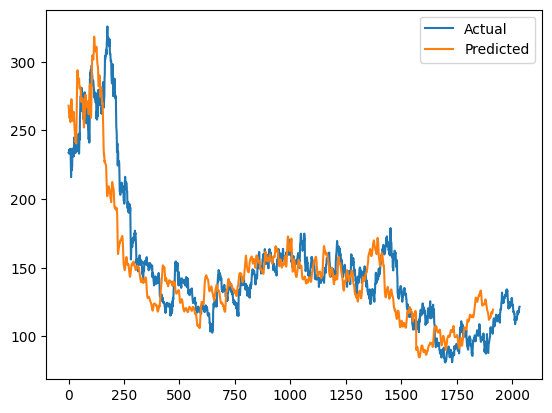

In [ ]:
# Plot the results
plt.plot(df['Close'].values, label='Actual')
plt.plot(np.concatenate([train_predictions, test_predictions]), label='Predicted')
plt.legend()
plt.show()

In [ ]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predictions))

162.85366037794412

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predictions))


105.64334571677848